In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import os, sys, time, pickle, math

### Load and process dataset

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

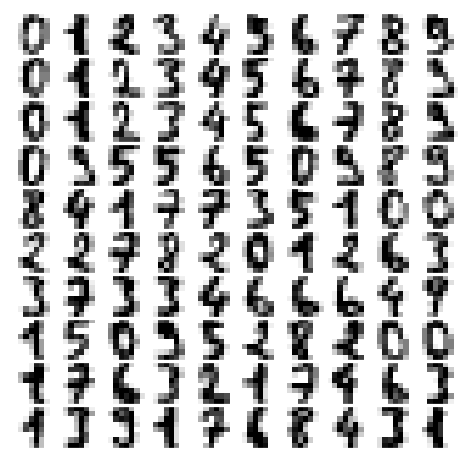

In [64]:
def plot_digits(data, chang=10, kuan=10):
    fig, ax = plt.subplots(chang, kuan, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        #data_thresh = np.array([0 if xi < 4 else xi for xi in data[i]])
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [8]:
data_fname = 'datasets/MNIST/mnist_1797_afterPCA.npz'
np.savez(data_fname, data=data)

### Ground truth model?

In [24]:
gmm = GaussianMixture(5, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [25]:
data_new = gmm.sample(100)[0]
data_new.shape

(100, 41)

In [18]:
gmm.means_

array([[ 0.33989779, -0.18178791,  0.70508469, ..., -0.34283686,
        -0.11157235, -0.11833226],
       [ 0.19864607, -0.7224301 , -1.35580912, ..., -0.66769631,
        -0.39268492,  0.62875035],
       [ 0.41454378, -1.11186066,  0.33188127, ...,  0.12720416,
         0.05833926,  0.06400947],
       ...,
       [ 0.11565987, -0.24914928,  1.8543922 , ..., -0.60024441,
         0.02348929,  0.52225471],
       [ 0.03404666, -0.69709661,  0.2670987 , ...,  0.27713961,
         0.09160208,  0.16797694],
       [-0.31012557, -0.27187838, -0.48921114, ...,  0.10679839,
         0.16537249, -0.2429559 ]])

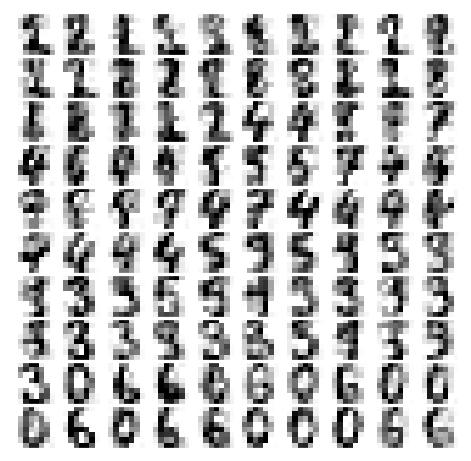

In [26]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

### EM Results from us

In [28]:
def import_result_EM(fname):
    with open(fname, "rb") as p:
        res1 = pickle.load(p)
    pi = [r["pi"] for r in res1]
    mu = [r["mu"] for r in res1]
    conv = [r["conv"] for r in res1]
    loss = [r["loss"] for r in res1]
    iters = [r["iters"] for r in res1]
    time = [r["time"] for r in res1]
    init_guess = [r["init_guess"] for r in res1]
    return pi, mu, conv, loss, iters, time, init_guess

In [44]:
k5 = import_result_EM("results/MNIST/EM/EM-K=5-lam=0-N=1797.p")

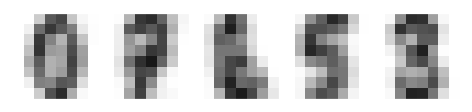

In [47]:
plot_digits(pca.inverse_transform(k5[1][0]), chang=1, kuan = 5)

In [50]:
k10 = import_result_EM("results/MNIST/EM/EM-K=10-lam=0-N=1797.p")

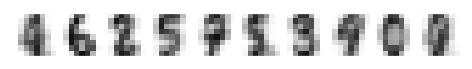

In [65]:
plot_digits(pca.inverse_transform(k10[1][1]), chang=1, kuan = 10)

In [39]:
k2[1][0].shape

(2, 41)

ValueError: cannot reshape array of size 128 into shape (8,8)

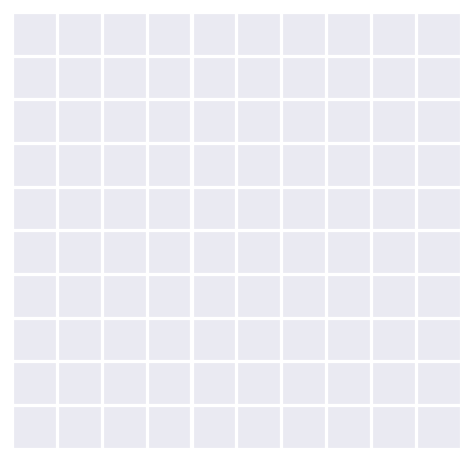

In [37]:
digits_mean = pca.inverse_transform(k2[1])
plot_digits(digits_mean)